In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url ='https://edesur.com.do/media/i0qhltyh/edesur-datos-abiertos-clientes-circuitos-24-horas-2021-02.xlsx'

datos = pd.read_excel(url)
datos


,Sector,CIRCUITOS 24 Hrs,CLIENTES EN CIRCUITOS 24 Hrs,MES,AÑO
0,Azua,6,17967,Enero,2017
1,Azua,6,18035,Febrero,2017
2,Azua,6,18192,Marzo,2017
3,Azua,6,17919,Abril,2017
4,Azua,6,17919,Mayo,2017
...,...,...,...,...,...
495,Villa Altagracia,13,55566,Octubre,2020
496,Villa Altagracia,13,57519,Noviembre,2020
497,Villa Altagracia,13,57949,Diciembre,2020
498,Villa Altagracia,13,56056,Enero,2021


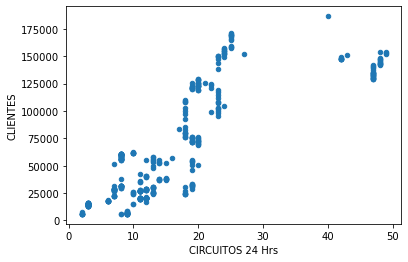

In [7]:
datos.plot.scatter(x='CIRCUITOS 24 Hrs', y='CLIENTES EN CIRCUITOS 24 Hrs')
plt.xlabel('CIRCUITOS 24 Hrs')
plt.ylabel('CLIENTES')
plt.show()

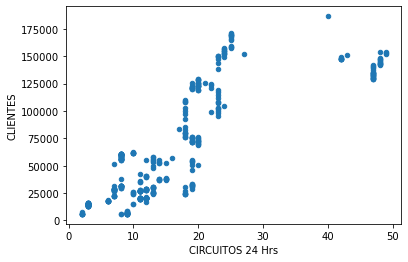

Epoch 1000
    w: 3618.8  b: 2004.9
    error: [8.56183296e+08]
Epoch 2000
    w: 3561.8  b: 3411.1
    error: [8.51200698e+08]
Epoch 3000
    w: 3518.7  b: 4476.8
    error: [8.4833871e+08]
Epoch 4000
    w: 3486.0  b: 5284.5
    error: [8.46694795e+08]
Epoch 5000
    w: 3461.2  b: 5896.7
    error: [8.45750535e+08]
Epoch 6000
    w: 3442.5  b: 6360.7
    error: [8.45208155e+08]
Epoch 7000
    w: 3428.2  b: 6712.3
    error: [8.44896614e+08]
Epoch 8000
    w: 3417.5  b: 6978.8
    error: [8.44717666e+08]
Epoch 9000
    w: 3409.3  b: 7180.7
    error: [8.44614879e+08]
Epoch 10000
    w: 3403.1  b: 7333.8
    error: [8.44555838e+08]
Epoch 11000
    w: 3398.4  b: 7449.8
    error: [8.44521925e+08]
Epoch 12000
    w: 3394.8  b: 7537.8
    error: [8.44502446e+08]
Epoch 13000
    w: 3392.1  b: 7604.4
    error: [8.44491257e+08]
Epoch 14000
    w: 3390.1  b: 7654.9
    error: [8.4448483e+08]
Epoch 15000
    w: 3388.5  b: 7693.2
    error: [8.44481139e+08]
Epoch 16000
    w: 3387.4  b: 7722.2

Text(0, 0.5, 'ECM')

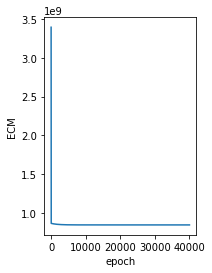

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#
# Funciones para el cálculo del gradiente descendente
# 

def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

#
# Leer los datos en un DataFrame de Pandas
#

url ='https://edesur.com.do/media/i0qhltyh/edesur-datos-abiertos-clientes-circuitos-24-horas-2021-02.xlsx'
datos = pd.read_excel(url)

datos

# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='CIRCUITOS 24 Hrs', y='CLIENTES EN CIRCUITOS 24 Hrs')
plt.xlabel('CIRCUITOS 24 Hrs')
plt.ylabel('CLIENTES')
plt.show()


x = datos['CIRCUITOS 24 Hrs'].values
y = datos['CLIENTES EN CIRCUITOS 24 Hrs'].values

#
# Aprender los coeficientes "w" y "b" usando el gradiente descendente
#

# Inicializar "w" y "b" aleatoriamente, definir alpha y número de iteraciones.
# En este caso se debe definir una tasa de aprendizaje muy pequeña (w=0.0004) para
# garantizar la convergencia del algoritmo


np.random.seed(2)           # Para reproducibilidad del entrenamiento
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

alpha = 0.0004
nits = 40000

# Entrenamiento
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

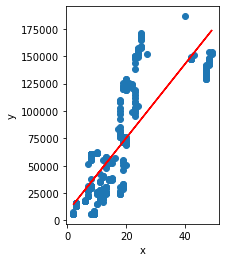

Con 70 circuitos de 24hrs aumentariamos una cantidad de 244672 clientes más con 24hrs de energía eléctrica.


In [3]:
y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Predicción
circuitos = 70
clientes = calcular_modelo(w,b,circuitos)
print("Con {}".format(circuitos), "circuitos de 24hrs aumentariamos una cantidad de {:.0f}".format(clientes), "clientes más con 24hrs de energía eléctrica.")